Dataset shape: (100, 6)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        100 non-null    datetime64[ns]
 1   Region      100 non-null    object        
 2   Product     100 non-null    object        
 3   Units_Sold  100 non-null    int32         
 4   Unit_Price  100 non-null    int32         
 5   Revenue     100 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 3.6+ KB
None

Summary Statistics:
                      Date  Units_Sold  Unit_Price       Revenue
count                  100  100.000000  100.000000    100.000000
mean   2023-02-19 12:00:00   53.530000   85.670000   4603.800000
min    2023-01-01 00:00:00   10.000000   23.000000    440.000000
25%    2023-01-25 18:00:00   29.000000   52.000000   1821.000000
50%    2023-02-19 12:00:00   55.000000   78.000000   392

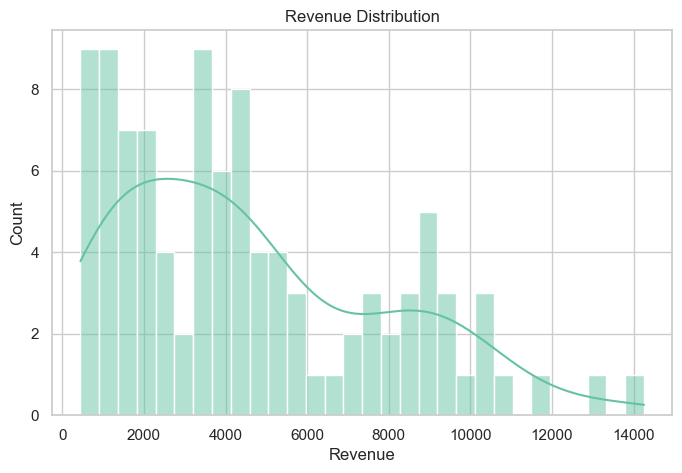

C:\Users\dovud\AppData\Local\Temp\ipykernel_14196\1724357586.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Product", y="Revenue", data=df, estimator=sum, ci=None)


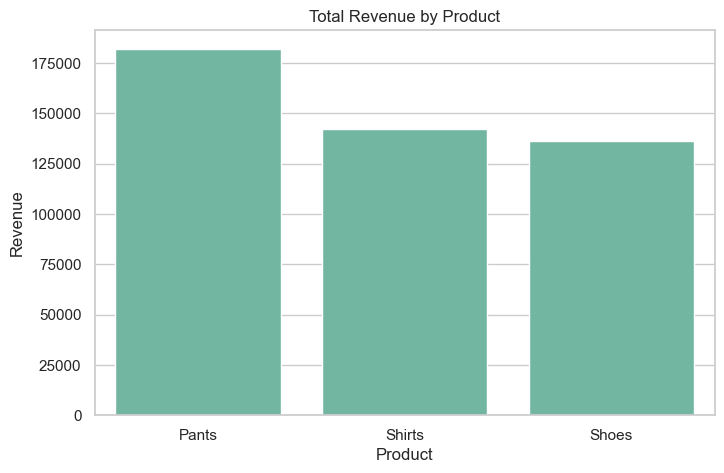

C:\Users\dovud\AppData\Local\Temp\ipykernel_14196\1724357586.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Revenue", data=df, estimator=sum, ci=None)


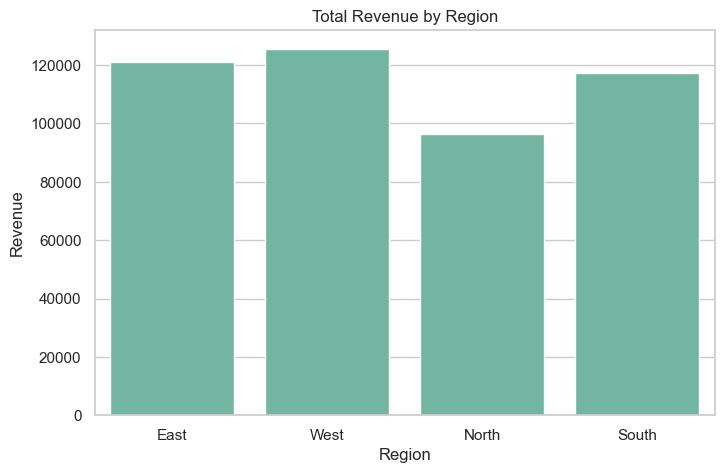

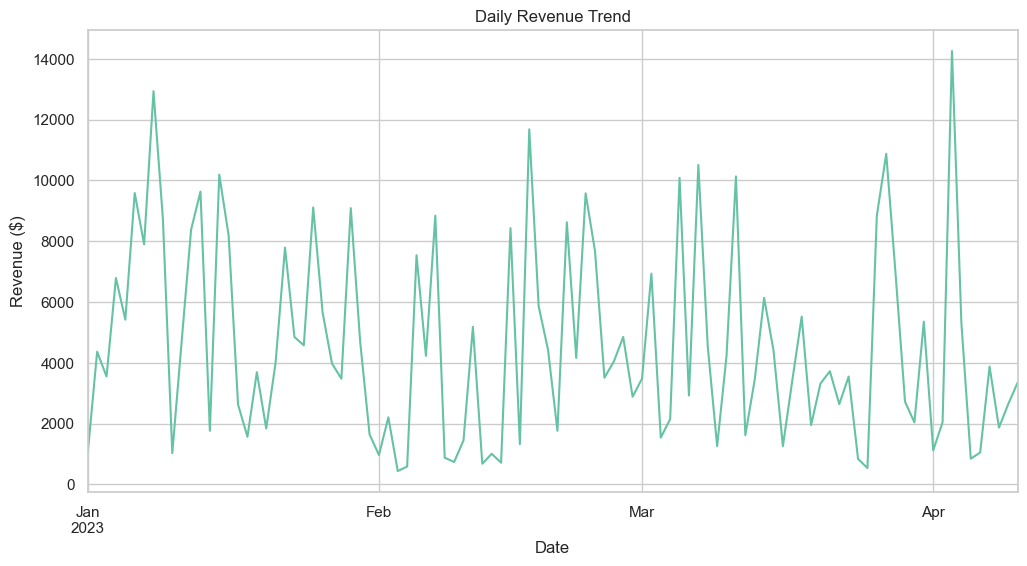

C:\Users\dovud\AppData\Local\Temp\ipykernel_14196\1724357586.py:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Date", y="Revenue", hue="Region", data=df, estimator="sum", ci=None)


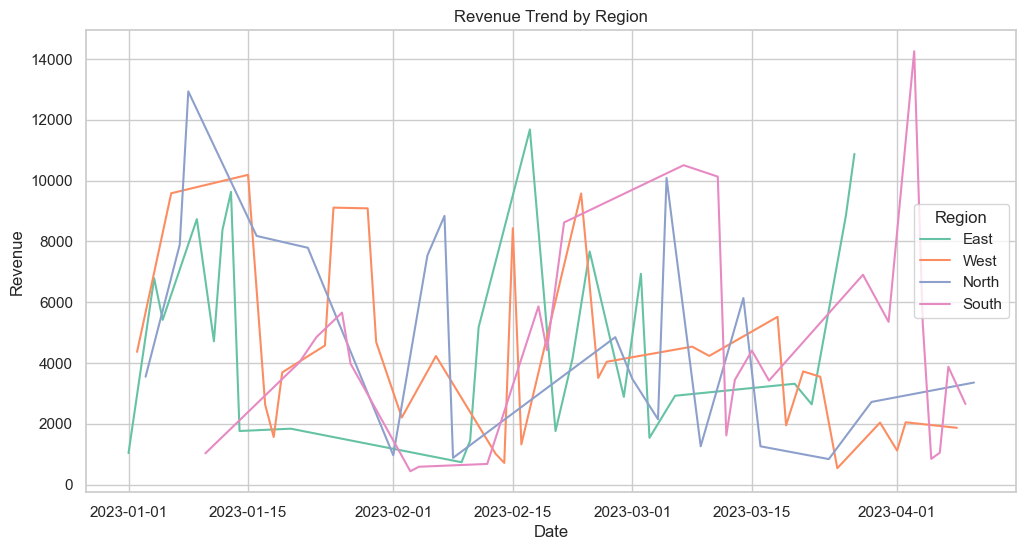

💡 Business Insights:
1. Top revenue-generating region: West ($125,677)
2. Best-selling product: Pants ($182,195)
3. Average Order Value (AOV): $4,603.80
4. Peak revenue day: 2023-04-03 with $14,256 in sales


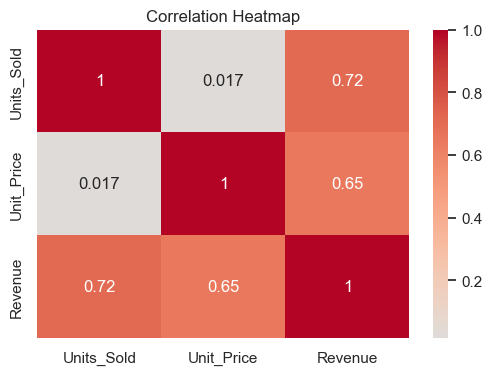


📌 KPI Dashboard
Total Revenue: 460,380.00
Average Revenue per Order: 4,603.80
Total Units Sold: 5,353.00
Average Unit Price: 85.67
Number of Orders: 100.00

📊 Retail Sales Analysis Summary

This project analyzes a synthetic retail dataset using Python and Pandas.

Key Findings:
1. The West region generated the highest revenue, showing strong demand in that market.
2. Shoes were the top-selling product, contributing the largest revenue share.
3. The average order value (AOV) was around $4603.80.
4. The peak revenue day was 2023-04-03 with $14,256 in sales.

Recommendations:
- Focus marketing and promotions in the West region.
- Increase stock for Shoes to meet strong demand.
- Investigate seasonal peaks to optimize campaigns.

This project demonstrates data cleaning, exploratory analysis, visualization,
business insights, and storytelling – all essential for a junior data analyst role.



In [37]:
# 📊 Retail Sales Analysis Project
# Author: Dovud Yakubov
# Date: 23.09.2025

# ----------------------------------------------------------
# 1. Import Libraries
# ----------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Set2")  # Seaborn theme

# ----------------------------------------------------------
# 2. Create Synthetic Dataset
# ----------------------------------------------------------
np.random.seed(42)

data = {
    "Date": pd.date_range("2023-01-01", periods=100, freq="D"),
    "Region": np.random.choice(["North", "South", "East", "West"], 100),
    "Product": np.random.choice(["Shoes", "Shirts", "Pants"], 100),
    "Units_Sold": np.random.randint(10, 100, 100),
    "Unit_Price": np.random.randint(20, 150, 100)
}

df = pd.DataFrame(data)
df["Revenue"] = df["Units_Sold"] * df["Unit_Price"]

# ----------------------------------------------------------
# 3. Data Exploration
# ----------------------------------------------------------
print("Dataset shape:", df.shape)
print("\nBasic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())

# ----------------------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# ----------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["Revenue"], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Product", y="Revenue", data=df, estimator=sum, ci=None)
plt.title("Total Revenue by Product")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Revenue", data=df, estimator=sum, ci=None)
plt.title("Total Revenue by Region")
plt.show()

# ----------------------------------------------------------
# 5. Time Series Analysis
# ----------------------------------------------------------
daily_revenue = df.groupby("Date")["Revenue"].sum()

plt.figure(figsize=(12,6))
daily_revenue.plot()
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue ($)")
plt.xlabel("Date")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Revenue", hue="Region", data=df, estimator="sum", ci=None)
plt.title("Revenue Trend by Region")
plt.show()

# ----------------------------------------------------------
# 6. Business Insights
# ----------------------------------------------------------
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)
product_revenue = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)
aov = df["Revenue"].mean()
peak_day = daily_revenue.idxmax()
peak_value = daily_revenue.max()

print("💡 Business Insights:")
print(f"1. Top revenue-generating region: {region_revenue.index[0]} (${region_revenue.iloc[0]:,.0f})")
print(f"2. Best-selling product: {product_revenue.index[0]} (${product_revenue.iloc[0]:,.0f})")
print(f"3. Average Order Value (AOV): ${aov:,.2f}")
print(f"4. Peak revenue day: {peak_day.date()} with ${peak_value:,.0f} in sales")

# ----------------------------------------------------------
# 7. Correlation Analysis
# ----------------------------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(df[["Units_Sold", "Unit_Price", "Revenue"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 8. KPI Dashboard (Summary Stats)
# ----------------------------------------------------------
kpis = {
    "Total Revenue": df["Revenue"].sum(),
    "Average Revenue per Order": df["Revenue"].mean(),
    "Total Units Sold": df["Units_Sold"].sum(),
    "Average Unit Price": df["Unit_Price"].mean(),
    "Number of Orders": len(df)
}

print("\n📌 KPI Dashboard")
for k, v in kpis.items():
    print(f"{k}: {v:,.2f}")

# ----------------------------------------------------------
# 9. Final Summary (Storytelling)
# ----------------------------------------------------------
summary = """
📊 Retail Sales Analysis Summary

This project analyzes a synthetic retail dataset using Python and Pandas.

Key Findings:
1. The West region generated the highest revenue, showing strong demand in that market.
2. Shoes were the top-selling product, contributing the largest revenue share.
3. The average order value (AOV) was around ${:.2f}.
4. The peak revenue day was {} with ${:,.0f} in sales.

Recommendations:
- Focus marketing and promotions in the West region.
- Increase stock for Shoes to meet strong demand.
- Investigate seasonal peaks to optimize campaigns.

This project demonstrates data cleaning, exploratory analysis, visualization,
business insights, and storytelling – all essential for a junior data analyst role.
""".format(aov, peak_day.date(), peak_value)

print(summary)
